# Predicting the IRS 501(c) 
Jon Tyler  

  
  
"The IRS maintains several important nonprofit databases to track the current population of exempt organizations, their annual 990 filings, and organizations that have closed. This data has been released in formats that are not always easy to use - ASCII text files, json files, and XML queries. In order to make the data accessible to the research community, [Jesse Lecy and a team](https://lecy.github.io/Open-Data-for-Nonprofit-Research/) have created scripts to download data from IRS websites, clean and process it, and export into familiar formats (CSV, Stata, SPSS, etc.)." [Open Data for Nonprofit Research](https://github.com/lecy/Open-Data-for-Nonprofit-Research)  

It is from the hard work in those notebooks that allowed me to explore this data set.  

The IRS breaks down non-profit organzations into subgroups based on the type of work the orginzation does. There was a change in that coding guideline in 1995 where a new system was adopted - National Taxonomy of Exempt Entities (NTEE) Codes. I will attempt to to predict these categories (seen below) given other characteristics from their submitted tax forms.

NTEE Category | Definition
---------|---------------
A           |          Arts, Culture, and Humanities
B           |          Education
C           |          Environmental Quality, Protection, and Beautification
D           |          Animal-Related
E           |          Health
F           |          Mental Health, Crisis Intervention
G           |          Diseases, Disorders, Medical Disciplines
H           |          Medical Research
I           |          Crime, Legal Related
J           |          Employment, Job Related
K           |          Food, Agriculture, and Nutrition
L           |          Housing, Shelter
M           |          Public Safety
N           |          Recreation, Sports, Leisure, Athletics
O           |          Youth Development
P           |          Human Services - Multipurpose and Other
Q           |          International, Foreign Affairs, and National Security
R           |          Civil Rights, Social Action, Advocacy
S           |          Community Improvement, Capacity Building
T           |          Philanthropy, Voluntarism, and Grantmaking Foundations
U           |          Science and Technology Research Institutes, Services
V           |          Social Science Research Institutes, Services
W           |          Public, Society Benefit - Multipurpose and Other
X           |          Religion Related, Spiritual Development
Y           |          Mutual/Membership Benefit Organizations, Other
Z           |          Unknown

## Obtaining the Data

[Open Data for Nonprofit Research](https://github.com/lecy/Open-Data-for-Nonprofit-Research) produced a R code to query, pull, and save the IRS data. Please see [this](Data_pull_in_R.ipynb) notebook for further details.

## Data cleaning

Following the normal routine, import the dataset and make sure it was read correctly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('BusinessMasterFile.csv')
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME,RULEYEAR,LEVEL4,ACT1,ACT2,ACT3
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,NaN,NaN,NaN,NaN,3514,1955,NaN,100,0.0,0.0
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,NaN,NaN,NaN,NaN,NaN,1972,NaN,100,0.0,0.0
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,NaN,NaN,NaN,X21,NaN,2004,X,0,NaN,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,NaN,NaN,NaN,X20,NaN,2004,X,0,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 33 columns):
EIN                 int64
NAME                object
ICO                 object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
RULING              int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
TAX_PERIOD          float64
ASSET_CD            int64
INCOME_CD           int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
LEVEL4              object
ACT1                int64
ACT2                float64
ACT3                float64
dtypes: 

In [4]:
df.columns

Index(['EIN', 'NAME', 'ICO', 'STREET', 'CITY', 'STATE', 'ZIP', 'GROUP',
       'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION', 'RULING',
       'DEDUCTIBILITY', 'FOUNDATION', 'ACTIVITY', 'ORGANIZATION', 'STATUS',
       'TAX_PERIOD', 'ASSET_CD', 'INCOME_CD', 'FILING_REQ_CD',
       'PF_FILING_REQ_CD', 'ACCT_PD', 'ASSET_AMT', 'INCOME_AMT', 'REVENUE_AMT',
       'NTEE_CD', 'SORT_NAME', 'RULEYEAR', 'LEVEL4', 'ACT1', 'ACT2', 'ACT3'],
      dtype='object')

### Column Description

The following information is taken from official IRS documentation of this dataset. This documentation can be found [here](irs_jan_2010.pdf)

| Column Name | Contents |
|-------------|----------|
| EIN |Employer Identification Number (EIN)|
| NAME |Primary Name of Organization |
| ICO  | In Care of Name|
| STREET | Street Address|
| CITY | City |
| STATE | State |
| ZIP | Zip Code |
| GROUP |Group Exemption Number |
|SUBSECTION | Subsection Code |
| AFFILIATION | Affiliation Code(s) |
| CLASSIFICATION | Classification Code(s)|
| RULING | Ruling Date |
| DEDUCTIBILITY | Deductibility Code |
| FOUNDATION | Foundation Code |
|  ACTIVITY | Activity Codes |
| ORGANIZATION | Organization Code |
| STATUS | Exempt Organization Status Code |
| TAX_PERIOD | Tax Period |
|ASSET_CD           |          Asset Code|
|  INCOME_CD           |          Income Code|
| FILING_REQ_CD     |          Filing Requirement Code |
|  ACCT_PD           |          Accounting Period|
| ASSET_AMT           |          Asset Amount |
| INCOME_AMT           |          Income Amount (includes negative sign if amount is negative) |
| REVENUE_AMT           |          Form 990 Revenue Amount (includes negative sign if amount is negative) |
| NTEE_CD National           |          Taxonomy of Exempt Entities (NTEE) Code |
SORT_NAME           |          Sort Name (Secondary Name Line) |

There are a few additional columns that were created during the retrieval of the dataset.  
- The variable `ACTIVITIES` consists of three separate 3-digit activity codes. These were split these into separate variables: `ACT1`, `ACT2`, `ACT3`. 
- `LEVEL4` broke down the entries with the `NTEE` coding into the major category.
- `RULEYEAR` split out the year from `RULING` which was formatted as YYYY-MM

Now lets investigate missing values.

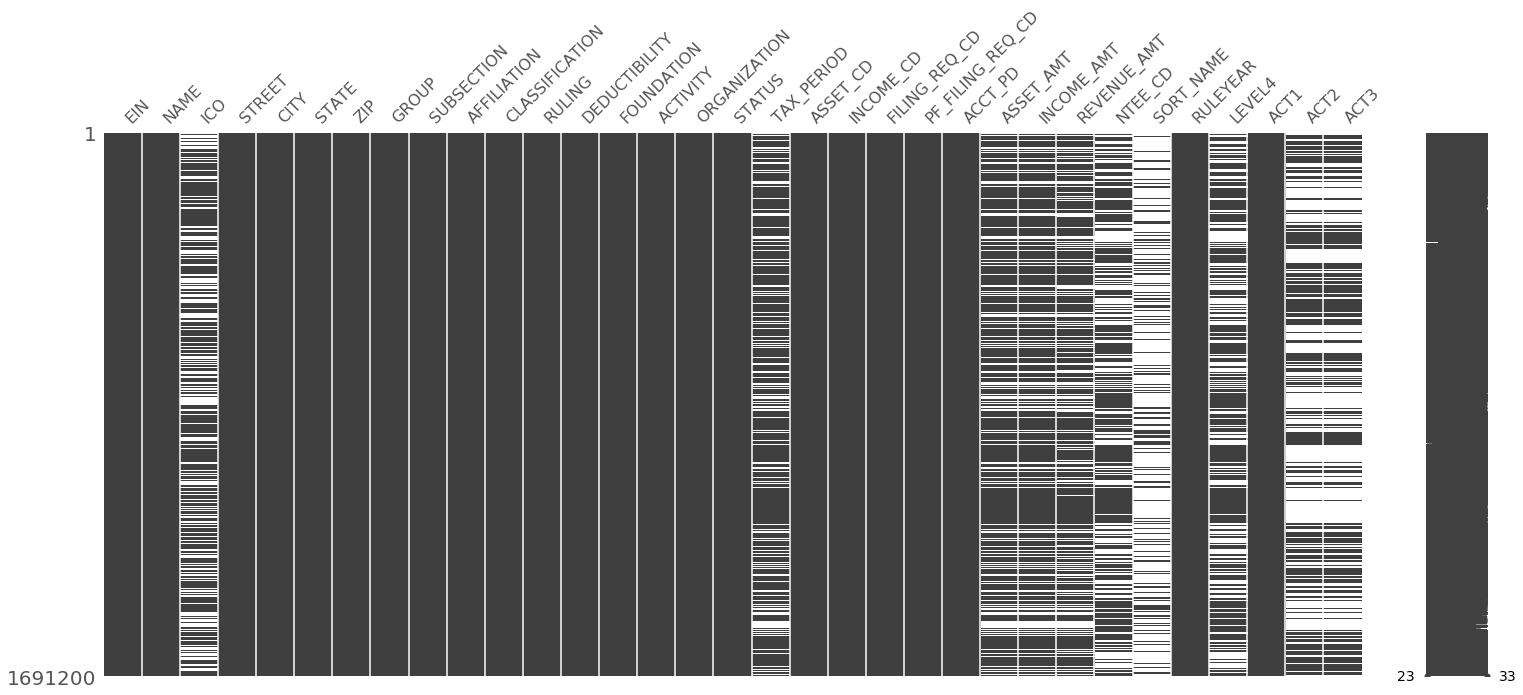

In [5]:
import missingno as msno
msno.matrix(df)

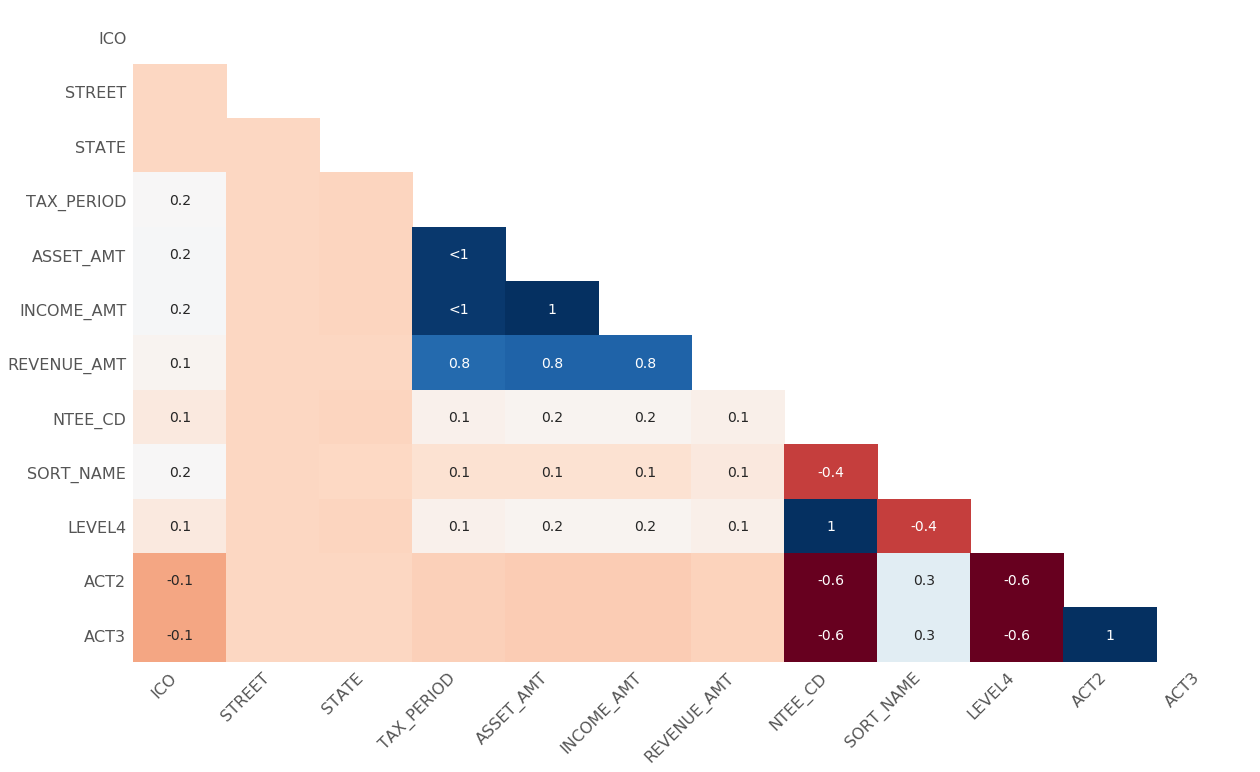

In [6]:
msno.heatmap(df)

As expected there is correlation between the different levels `ACT`. Also, as expected, a perfect correlation of missing values from `LEVEL4` and `NTEE_CD`. 

There is a clear pattern in the missing values from `REVENUE_AMT`, `ASSET_AMT`, `INCOME_AMT`, and `TAX_PERIOD`. So lets take a closer look at those columns.

In [7]:
print(df.REVENUE_AMT.value_counts()[:5])
print('--------------------------------')
print(df.REVENUE_AMT.isna().value_counts())

0.0        688791
1000.0        296
500.0         221
5000.0        215
100.0         214
1.0           204
10000.0       185
2000.0        163
3000.0        133
200.0         129
1500.0        122
2500.0        116
2.0           105
6000.0        103
300.0          99
5.0            98
Name: REVENUE_AMT, dtype: int64
--------------------------------
False    1212088
True      479112
Name: REVENUE_AMT, dtype: int64


In [8]:
print(df.ASSET_AMT.value_counts()[:5])
print('--------------------------------')
print(df.ASSET_AMT.isna().sum())
print('--------------------------------')
print(df.ASSET_CD.value_counts()[:5])
print('--------------------------------')
print(df.ASSET_CD.isna().sum())

0.0        677902
1.0         15623
100.0         285
1000.0        217
500.0         191
200.0         120
2000.0        108
5000.0        103
10.0          101
50.0           90
300.0          83
1500.0         81
150.0          73
10000.0        69
25.0           69
5.0            67
Name: ASSET_AMT, dtype: int64
--------------------------------
368826
--------------------------------
0    1032113
4     169004
3     123873
6     101784
1      80491
Name: ASSET_CD, dtype: int64
--------------------------------
0


`ASSET_AMT` is continuous data, rather than the coded data in `ASSET_CD`, so I will keep the amounts reported over the IRS prebinned values. I can alter it myself if need be.  

Through further look the the IRS [documentation](irs_jan_2010.pdf) of these columns, there seems to be some discrepancy in values from the coded and the reported, which makes my decision to drop the `_CD` versions of Income and Asset.

### Scrub 1

With over 1.6 million rows, this is large dataset. Starting things off, first drop the columns that I will not be using.  

With my target going to be the Major Group the non-profit belongs to, I will drop the `LEVEL4` column as well. This is to ensure integrity of my models working or failing based on my own work, rather than relying on others.  

I am planning to break the dataset into subsets: 
- Full dataset, recoding the old `ACTIVITY` codes into the NTEE Major Groups
- Post-1995, only the IRS coded entities
- Downsized portion, specifically with equal class sizes

In [9]:
df.drop(['ICO', 
         'RULING',
         'ACT1',
         'ACT2', 
         'ACT3', 
         'ASSET_CD', 
         'INCOME_CD', 
         'LEVEL4', 
         'TAX_PERIOD'], axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691200 entries, 0 to 1691199
Data columns (total 24 columns):
EIN                 int64
NAME                object
STREET              object
CITY                object
STATE               object
ZIP                 object
GROUP               int64
SUBSECTION          int64
AFFILIATION         int64
CLASSIFICATION      int64
DEDUCTIBILITY       int64
FOUNDATION          int64
ACTIVITY            int64
ORGANIZATION        int64
STATUS              int64
FILING_REQ_CD       int64
PF_FILING_REQ_CD    int64
ACCT_PD             int64
ASSET_AMT           float64
INCOME_AMT          float64
REVENUE_AMT         float64
NTEE_CD             object
SORT_NAME           object
RULEYEAR            int64
dtypes: float64(3), int64(14), object(7)
memory usage: 309.7+ MB


Now lets figure out something to do with the missing values within the columns I kept.

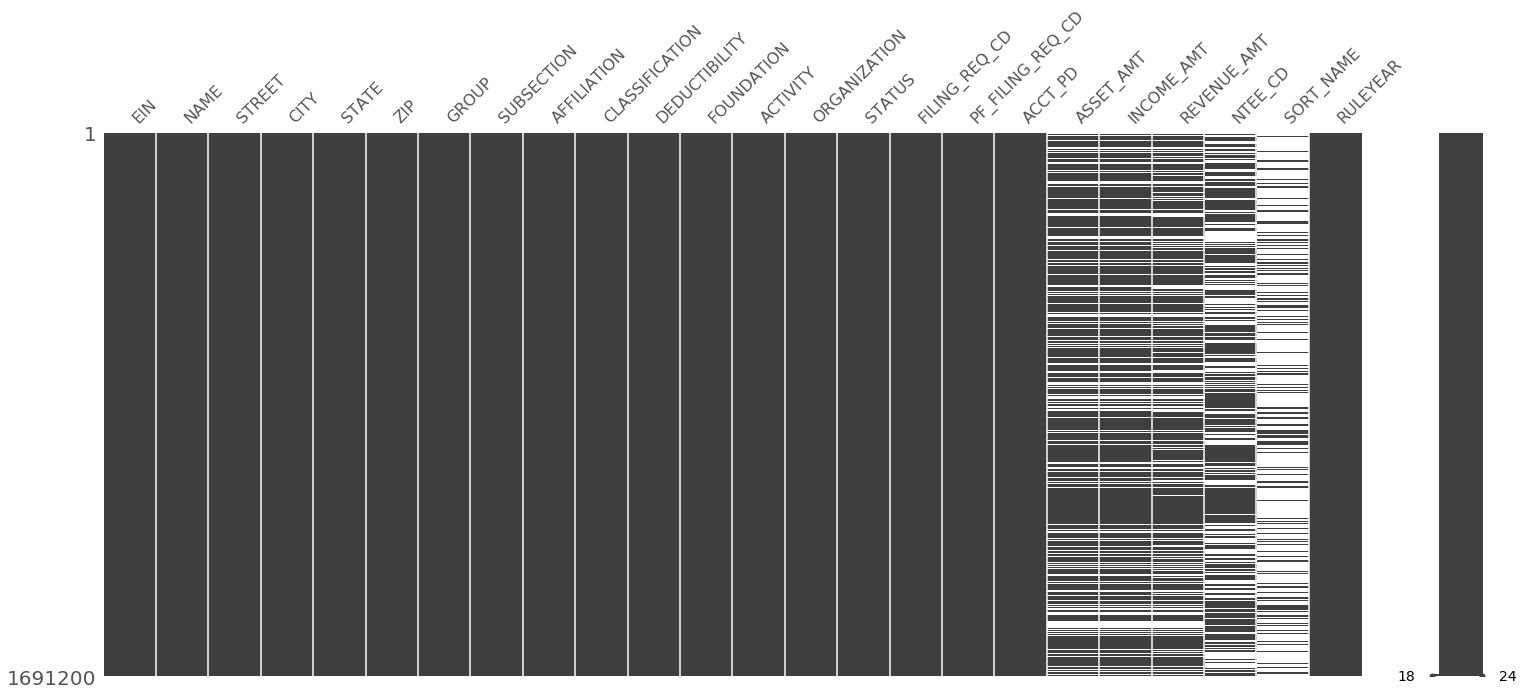

In [12]:
msno.matrix(df)

There is a clear pattern of missing values from `ASSET_AMT`,`INCOME_AMT`, and `REVENUE_AMT`. I will drop values from one column, extending down the rows and then will recheck the patterns.

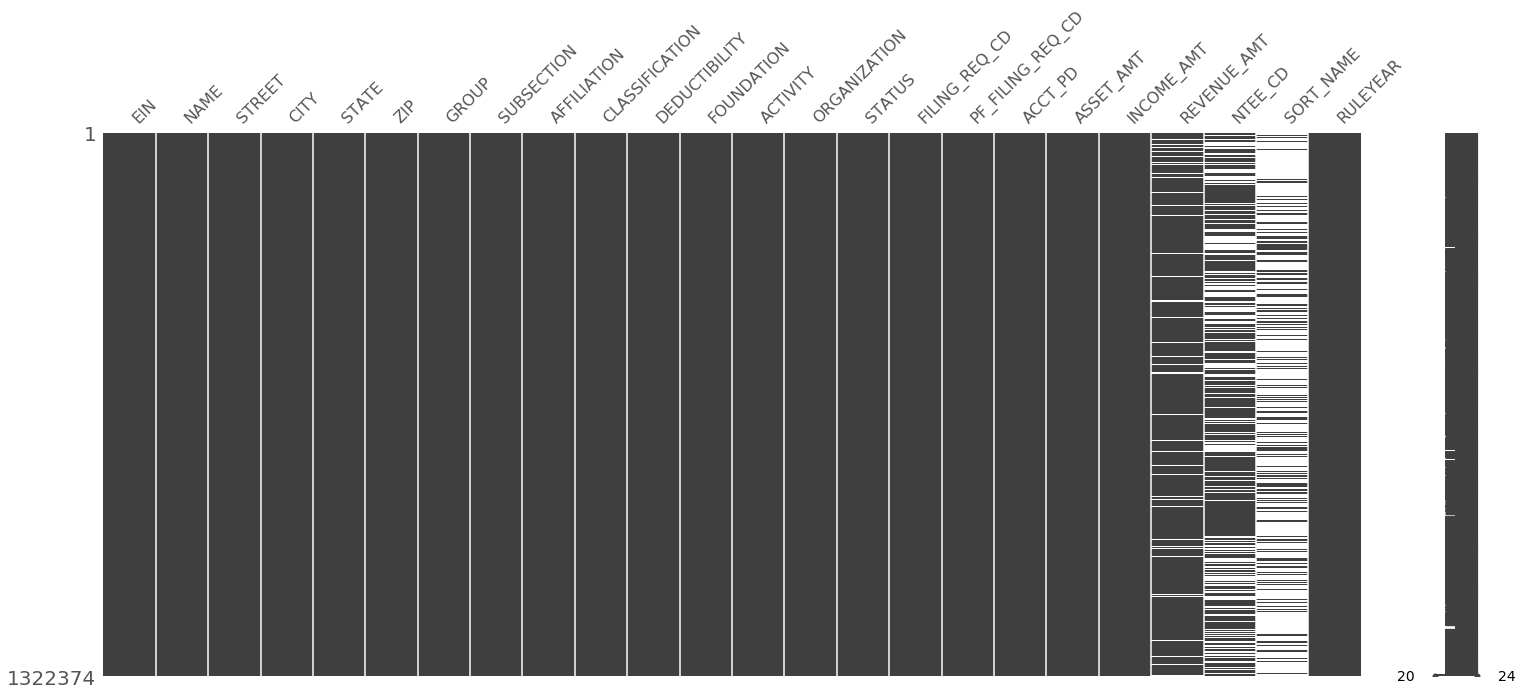

In [13]:
df = df.dropna(subset=['ASSET_AMT']) #Drop based on the subset column or columns
msno.matrix(df)

~370,000 entries were removed. 

In [14]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                 1062
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT         110286
NTEE_CD             451552
SORT_NAME           965875
RULEYEAR                 0
dtype: int64

The last 100K from `REVENUE_AMT` will be dropped as well. I will combine the `SORT_NAME` column with the `NAME` column since they both come from the same field, just a different line. `NTEE_CD` will be addressed seperately as well.

In [15]:
df = df.dropna(subset=['REVENUE_AMT'])

In [16]:
df.isna().sum()

EIN                      0
NAME                     0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
SORT_NAME           868547
RULEYEAR                 0
dtype: int64

Creating the full name of the group or organization, then dropping the excess columns 

In [17]:
df.SORT_NAME = df.SORT_NAME.fillna(value = '') #Replaces np.NaN values with something else, string + np.NaN = np.NaN
df['NAME_FULL'] = df.NAME + ' ' + df.SORT_NAME #New column
df.drop(['NAME', 'SORT_NAME'], axis=1, inplace=True) #Getting rid of the old
df.head()

,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,STATUS,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,NAME_FULL
12,10002847,PO BOX 126,HULLS COVE,ME,04644-0126,0,3,3,1000,1,...,1,2,0,12,0.0,0.0,0.0,A80,2000,HULLS COVE NEIGHBORHOOD ASSOCIATION
13,10011694,30 SAMUEL PRESCOTT DR,STOW,MA,01775-1167,0,3,3,1000,1,...,1,2,0,12,0.0,0.0,0.0,S19,2015,MASSACHUSETTS MODERATORS ASSOCIATION
14,10015091,PO BOX 13,CEDAR KNOLLS,NJ,07927-0013,0,3,3,1000,1,...,1,1,0,12,62462.0,140685.0,140685.0,N64,2012,HANOVER SOCCER CLUB INC
15,10017496,PO BOX 534,YORK HARBOR,ME,03911-0534,0,3,3,2000,1,...,1,1,0,12,233819.0,180773.0,127013.0,NaN,1993,AGAMENTICUS YACHT CLUB OF YORK
16,10018555,81 COLLEGE AVE,ORONO,ME,04473-4210,287,7,9,1000,2,...,1,2,0,12,0.0,0.0,0.0,NaN,1941,ALPHA TAU OMEGA FRATERNITY BETA UPSILION MAINE...


In [18]:
df.isna().sum()

EIN                      0
STREET                   2
CITY                     0
STATE                  940
ZIP                      0
GROUP                    0
SUBSECTION               0
AFFILIATION              0
CLASSIFICATION           0
DEDUCTIBILITY            0
FOUNDATION               0
ACTIVITY                 0
ORGANIZATION             0
STATUS                   0
FILING_REQ_CD            0
PF_FILING_REQ_CD         0
ACCT_PD                  0
ASSET_AMT                0
INCOME_AMT               0
REVENUE_AMT              0
NTEE_CD             415581
RULEYEAR                 0
NAME_FULL                0
dtype: int64

My target is going to `ACTIVITY`/`NTEE_CD`. The values in `ACTIVITY` are 9 characters long, each set of three indicating what kind of the organization it is. The codes used can be found [here](irs_jan_2010.pdf). There are some that needed more than one set of three to define their organization, others only have one. I plan to use only the first activity code, with the idea it would be the primary category. Also I have to keep in mind, there are groups that could apply to different targets based on all three activity codes. 

It is stated by [Open Data for Nonprofit Research](https://github.com/lecy/Open-Data-for-Nonprofit-Research) the data itself is not that clean. Effort will be made to tidy it up.

The NTEE_CD code was introduced to replace the three digit code in 1995. I will make my own mapping from the old system to the new system. Lets take look at what I have at hand first. 

In [19]:
df.loc[(df.NTEE_CD.notna()) & (df.ACTIVITY == 0)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604936 entries, 12 to 1691194
Data columns (total 23 columns):
EIN                 604936 non-null int64
STREET              604936 non-null object
CITY                604936 non-null object
STATE               604403 non-null object
ZIP                 604936 non-null object
GROUP               604936 non-null int64
SUBSECTION          604936 non-null int64
AFFILIATION         604936 non-null int64
CLASSIFICATION      604936 non-null int64
DEDUCTIBILITY       604936 non-null int64
FOUNDATION          604936 non-null int64
ACTIVITY            604936 non-null int64
ORGANIZATION        604936 non-null int64
STATUS              604936 non-null int64
FILING_REQ_CD       604936 non-null int64
PF_FILING_REQ_CD    604936 non-null int64
ACCT_PD             604936 non-null int64
ASSET_AMT           604936 non-null float64
INCOME_AMT          604936 non-null float64
REVENUE_AMT         604936 non-null float64
NTEE_CD             604936 non-null o

In [20]:
df.NTEE_CD.notna().sum()

796507

In [21]:
df.NTEE_CD.isna().sum()

415581

In [22]:
df.ACTIVITY.value_counts()[:10]

0            648115
59000000      12946
907908000     11636
59035000      11596
205000000     10981
36000000      10129
263264279      9497
200000000      9436
319000000      8836
59319000       8748
Name: ACTIVITY, dtype: int64

There is something wrong with the above `.value_counts()`.   

The Activity Codes provided by the IRS have leading zeroes. Since there wasn't an attempt to control for it them when orginally reading the files, I want further to investigate if the `ACTIVITY` lines contain 9 characters. If they don't, I will adjust them accordingly.

In [23]:
temp = df.ACTIVITY

In [24]:
length = []
for x in temp:
    length.append(len(str(x)))
pd.Series(length).value_counts()

1    648115
9    389701
8    163953
7     10319
dtype: int64

As expected, adjustments are need. Make a small function that will adjust the `ACTIVITY` input to match the 9 character length expected.

In [25]:
def adj_len(num):
    string = str(num)
    
    if len(string) >= 7:
        
        if len(string) == 9:
            return int(string[0:3])
        if len(string) == 8:
            return int(string[0:2])
        if len(string) == 7:
            return int(string[0:1])
    else:
        return num
    

In [30]:
print(f'Produced: {adj_len(123456789)} Expected: 123')
print('-----------------')
print(f'Produced: {adj_len(42)} Expected: 42')
print('-----------------')
print(f'Produced: {adj_len(12345678)} Expected: 12')
print('-----------------')
print(f'Produced: {adj_len(1234567)} Expected: 1')
print('-----------------')

Produced: 123 Expected: 123
-----------------
Produced: 42 Expected: 42
-----------------
Produced: 12 Expected: 12
-----------------
Produced: 1 Expected: 1
-----------------


In [31]:
def code_NTEE_V1(y):
    
    x = adj_len(y)
    
    list_a =list(range(60,120))
    list_b =list(range(30,60)) + [540, 914]
    list_c =list(range(350,380)) + [529]
    list_d =[913]
    list_e =list(range(150,180)) + [531] + list(range(541,544))
    list_f = []
    list_g = []
    list_h = []
    list_i =list(range(460,466)) + [406, 526, 527, 528]
    list_j =list(range(120,150)) + list(range(200,230)) + [920]
    list_k =list(range(230,250)) + [916]
    list_l =list(range(380,400)) + [401]
    list_m =[902]
    list_n =list(range(280,320))
    list_o =list(range(320,350))
    list_p =list(range(563,576)) + [917, 918]
    list_q =list(range(510,514)) + [518, 519, 520, 522, 910, 911, 912]
    list_r =list(range(430,450)) + list(range(480,510)) + [261, 405, 481, 482, 534, 535, 924]
    list_s =list(range(408,430)) + [404, 524, 533, 903, 919, 921]
    list_t =list(range(600,604)) + list(range(560,563))
    list_u =list(range(180,200)) 
    list_v = []
    list_w =list(range(250,253)) + list(range(536,540)) + list(range(905,909)) + [262, 263, 400, 402, 403, 407, 514, 515, 516, 521, 523, 525, 530 , 532, 559, 915]
    list_x =list(range(1,30)) + [517]
    list_y =list(range(264,280)) + [253, 254, 259, 260, 900, 901, 922]
    list_z = []

    if x in list_a:
        return 'A'
    if x in list_b:
        return 'B'
    if x in list_c:
        return 'C'
    if x in list_d:
        return 'D'
    if x in list_e:
        return 'E'
    if x in list_f:
        return 'F'
    if x in list_g:
        return 'G'
    if x in list_h:
        return 'H'
    if x in list_i:
        return 'I'
    if x in list_j:
        return 'J'
    if x in list_k:
        return 'K'
    if x in list_l:
        return 'L' 
    if x in list_m:
        return 'M'
    if x in list_n:
        return 'N'
    if x in list_o:
        return 'O'
    if x in list_p:
        return 'P'
    if x in list_q:
        return 'Q'
    if x in list_r:
        return 'R'
    if x in list_s:
        return 'S'
    if x in list_t:
        return 'T'
    if x in list_u:
        return 'U'
    if x in list_v:
        return 'V'
    if x in list_w:
        return 'W'
    if x in list_x:
        return 'X'
    if x in list_y:
        return 'Y'
    if x in list_z:
        return 'Z'
    else:
        trouble.append(x)
        
    

Now for create a quick tester set to run through my functions.

In [40]:
small = df[:200]

In [41]:
print(code_NTEE_V1(205000000))

J


Test something with a leading zero, or an `ACTIVITY` that does not have 9 characters 

In [42]:
trouble = [] #Within my small data set, any codes that don't have a new label
small.ACTIVITY.apply(code_NTEE_V1)
print(set(trouble))
print(len(trouble))

{0, 994, 995, 999, 927}
18


With the quick check, there are codes that were not coded. This was to be expected. Within `trouble`, none of these are defined by the IRS. I suspect this set to grown once applied to the larger dataset.  

Within the process, I will update the master list with proper categorizations through out. The mapping will be adjusted accordingly. Please see the IRS documentation if further review is desired.



Before applying the function to the entire dataset, lets take care of the subset of rows that will not have any targets variable at all.

In [44]:
df.NTEE_CD.isna().sum()

415581

In [47]:
print(df[(df.NTEE_CD.isna()) & (df.ACTIVITY == 0)].shape)
df[(df.NTEE_CD.isna()) & (df.ACTIVITY == 0)].head()

(43179, 23)


,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,STATUS,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,NAME_FULL
32,10027415,1 TUFTS RD,BELFAST,ME,04915-7513,275,8,9,1000,0,...,1,2,0,3,0.0,0.0,0.0,NaN,0,ANCIENT FREE & ACCEPTED MASONS OF MAINE 24 BEL...
49,10055140,10 LITCHFIELD RD,HALLOWELL,ME,04347-1109,0,13,3,1000,0,...,1,1,0,6,546481.0,51568.0,36162.0,NaN,1976,HALLOWELL CENTENNIAL BURIAL GROUND ASSN INC
78,10114110,150 CAPITOL ST STE 5,AUGUSTA,ME,04330-6858,0,6,0,1000,0,...,1,1,0,9,142899.0,431279.0,431279.0,NaN,0,MAINE WATER UTILITIES ASSOCIATION
300,10216657,952 MAIN ST,SANFORD,ME,04073-3509,0,3,3,1200,1,...,1,1,0,6,1927624.0,624695.0,538612.0,NaN,1987,SANFORD LIBRARY ASSOCIATION LOUIS B GOODALL ME...
331,10220348,PO BOX 422,FARMINGTON,ME,04938-0422,5930,3,9,2000,1,...,1,2,0,6,0.0,0.0,0.0,NaN,2013,UNIVERSITY OF MAINE SYSTEM INC FRANKLIN COUNTY...


In [48]:
before = df.shape

mask = df.index[(df.NTEE_CD.isna()) & (df.ACTIVITY == 0)] #index numbers to drop
df = df.drop(mask)

after = df.shape

print(f'From {before} rows, down to {after} rows')

From (1212088, 23) rows, down to (1168909, 23) rows


Finally, lets apply our `code_NTEE_V1` function to our dataset. Since there were codes that were no already defined, lets just collect a list of them and then update a new version of my function with those values.

In [49]:
trouble = [] #the code_NTEE(X) function has a list to check the missing variables
look = df.ACTIVITY.apply(code_NTEE_V1)
set(trouble)

{0,
 451,
 556,
 578,
 605,
 607,
 610,
 630,
 632,
 650,
 651,
 659,
 681,
 700,
 705,
 713,
 720,
 740,
 750,
 760,
 787,
 801,
 850,
 860,
 899,
 904,
 909,
 923,
 925,
 926,
 927,
 928,
 930,
 931,
 933,
 967,
 990,
 993,
 994,
 995,
 998,
 999}

At this point, I updated my `code_NTEE` function. Open Data for Nonprofit Research recommended [Urban Center for Charitable Statistics](https://nccs.urban.org/publication/irs-activity-codes) site to further identify unfamiliar codes.  

I updated lists and created a new list for undefined codes. Also, there were a few ambigious codings that I have decided to drop altogeter. These includes definitions such as "Indians (tribes, cultures, etc.)" , "Government instrumentality or agency", and "947(a)(2) trust". Further man hours are required to shift through the material to categorize them with even more accuracy.  

### Scrub 2
Using the updated `code_NTEE_V2` function below, I will move forward with the data cleaning process.

In [50]:
def code_NTEE_V2(y):
    
    x = adj_len(y)
    
    list_a =list(range(60,120))
    list_b =list(range(30,60)) + [540, 914]
    list_c =list(range(350,380)) + [529]
    list_d =[913]
    list_e =list(range(150,180)) + [531] + list(range(541,544))
    list_f = []
    list_g = []
    list_h = []
    list_i =list(range(460,466)) + [406, 526, 527, 528]
    list_j =list(range(120,150)) + list(range(200,230)) + [920]
    list_k =list(range(230,250)) + [916]
    list_l =list(range(380,400)) + [401]
    list_m =[902]
    list_n =list(range(280,320))
    list_o =list(range(320,350))
    list_p =list(range(563,576)) + [917, 918]
    list_q =list(range(510,514)) + [518, 519, 520, 522, 910, 911, 912]
    list_r =list(range(430,450)) + list(range(480,510)) + [261, 405, 481, 482, 534, 535, 924]
    list_s =list(range(408,430)) + [404, 524, 533, 903, 919, 921]
    list_t =list(range(600,604)) + list(range(560,563))
    list_u =list(range(180,200)) 
    list_v = []
    list_w =list(range(250,253)) + list(range(536,540)) + list(range(905,909)) + [262, 263, 400, 402, 403, 407, 514, 515, 516, 521, 523, 525, 530 , 532, 559, 915]
    list_x =list(range(1,30)) + [517]
    list_y =list(range(264,280)) + [253, 254, 259, 260, 900, 901, 922]
    list_z = []
    
    too_vague = [904, 909, 923] + list(range(925,999))
    not_defined = [256, 257, 466,469, 470, 556, 557, 999] + list(range(450,460)) + list(range(484, 509)) + list(range(576, 600)) + list(range(603,900)) + too_vague

    if x == 0:
        return None
    if x in list_a:
        return 'A'
    if x in list_b:
        return 'B'
    if x in list_c:
        return 'C'
    if x in list_d:
        return 'D'
    if x in list_e:
        return 'E'
    if x in list_f:
        return 'F'
    if x in list_g:
        return 'G'
    if x in list_h:
        return 'H'
    if x in list_i:
        return 'I'
    if x in list_j:
        return 'J'
    if x in list_k:
        return 'K'
    if x in list_l:
        return 'L' 
    if x in list_m:
        return 'M'
    if x in list_n:
        return 'N'
    if x in list_o:
        return 'O'
    if x in list_p:
        return 'P'
    if x in list_q:
        return 'Q'
    if x in list_r:
        return 'R'
    if x in list_s:
        return 'S'
    if x in list_t:
        return 'T'
    if x in list_u:
        return 'U'
    if x in list_v:
        return 'V'
    if x in list_w:
        return 'W'
    if x in list_x:
        return 'X'
    if x in list_y:
        return 'Y'
    if x in list_z:
        return 'Z'
    if x in not_defined:
        return None
    else:
        trouble.append(x)
        
    

In [51]:
trouble = [] #the code_NTEE(X) function has a list to check the missing variables
look = df.ACTIVITY.apply(code_NTEE_V2)
trouble

[]

There were no trouble codes anymore. We will merge the changes and tidy up the last few things wrong with the data.
Keep in mind that this step heavily effects the target outcome in the joint dataset. This is can be a point of improvements in any further analysis of this data.

In [52]:
df.NTEE_CD.isna().sum()

372402

In [55]:
df.NTEE_CD.fillna(df.ACTIVITY.apply(code_NTEE_V2), inplace=True)

In [56]:
print(df.NTEE_CD.isna().sum())
df[df.NTEE_CD.isna()].head()

11515


,EIN,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,...,STATUS,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR,NAME_FULL
150,10192722,109 MAIN ST,HOULTON,ME,04730-2123,0,6,3,3000,2,...,1,1,0,12,27756.0,167351.0,83314.0,None,1946,HOULTON CHAMBER OF COMMERCE
235,10211564,PO BOX 888,LEWISTON,ME,04243-0888,0,3,3,1000,1,...,1,1,0,12,2638982.0,1287903.0,1270323.0,None,1961,UNITED WAY OF ANDROSCOGGIN COUNTY INC
411,10241354,10 BRIDGE ST,RUMFORD,ME,04276-2007,0,6,3,3000,2,...,1,1,0,6,23675.0,60997.0,42828.0,None,1944,RIVER VALLEY CHAMBER OF COMMERCE
547,10279581,123 MEDICAL CENTER DR,BRUNSWICK,ME,04011-2652,0,3,3,1000,1,...,1,1,0,6,164903.0,104651.0,104651.0,None,1973,MIDCOAST HOSPITAL-BRUNSWICK AUXILIARY
637,10315181,PO BOX 192,PHILLIPS,ME,04966-0192,0,3,3,1000,1,...,1,2,0,12,0.0,0.0,0.0,None,1972,SANDY RIVER AMBULANCE ASSOCIATION


Finally dropping the remaining ~11K rows that don't have a clear NTEE code.

In [57]:
df = df.dropna(subset=['NTEE_CD'])
df.shape

(1157394, 23)

In [58]:
df.isna().sum()

EIN                   0
STREET                1
CITY                  0
STATE               894
ZIP                   0
GROUP                 0
SUBSECTION            0
AFFILIATION           0
CLASSIFICATION        0
DEDUCTIBILITY         0
FOUNDATION            0
ACTIVITY              0
ORGANIZATION          0
STATUS                0
FILING_REQ_CD         0
PF_FILING_REQ_CD      0
ACCT_PD               0
ASSET_AMT             0
INCOME_AMT            0
REVENUE_AMT           0
NTEE_CD               0
RULEYEAR              0
NAME_FULL             0
dtype: int64

Now to drop the very small subset of missing values.

In [59]:
df.dropna(subset=['STATE', 'STREET'], inplace=True) #dropping the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1156499 entries, 12 to 1691185
Data columns (total 23 columns):
EIN                 1156499 non-null int64
STREET              1156499 non-null object
CITY                1156499 non-null object
STATE               1156499 non-null object
ZIP                 1156499 non-null object
GROUP               1156499 non-null int64
SUBSECTION          1156499 non-null int64
AFFILIATION         1156499 non-null int64
CLASSIFICATION      1156499 non-null int64
DEDUCTIBILITY       1156499 non-null int64
FOUNDATION          1156499 non-null int64
ACTIVITY            1156499 non-null int64
ORGANIZATION        1156499 non-null int64
STATUS              1156499 non-null int64
FILING_REQ_CD       1156499 non-null int64
PF_FILING_REQ_CD    1156499 non-null int64
ACCT_PD             1156499 non-null int64
ASSET_AMT           1156499 non-null float64
INCOME_AMT          1156499 non-null float64
REVENUE_AMT         1156499 non-null float64
NTEE_CD         

Now that I have my target variable set, albeit currently in two different formats, it is time to start removing the some excess columns and divide the data.

Removing the other columns that I won't be using to model my data with.

In [61]:
df = df.drop(['NAME_FULL', 'STREET', 'ZIP', 'CITY','ACTIVITY', 'EIN', 'ACCT_PD'], axis=1)

Now taking a look at `NTEE_CD` column and getting the proper format.

In [62]:
df.NTEE_CD.head()

12    A80
13    S19
14    N64
15      J
16      B
Name: NTEE_CD, dtype: object

Lets take this opportunity to split off a subsection of this data set that was given by the IRS in preparation for running in a model.

In [63]:
df_post = df[df.NTEE_CD.apply(lambda x: len(str(x)) > 2)]
df_post.shape

(795612, 16)

Lets remove the more specific coding form the `NTEE` column, just leaving the one of the 26 categories.

In [64]:
df.NTEE_CD = df.NTEE_CD.apply(lambda x: x[0:1])
df_post.NTEE_CD = df.NTEE_CD.apply(lambda x: x[0:1])

df.NTEE_CD.head(), df_post.NTEE_CD.head()

C:\Users\J\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(12    A
 13    S
 14    N
 15    J
 16    B
 Name: NTEE_CD, dtype: object, 12    A
 13    S
 14    N
 30    A
 38    Y
 Name: NTEE_CD, dtype: object)

### Target variable
Now lets take a quick look at our target distribution.

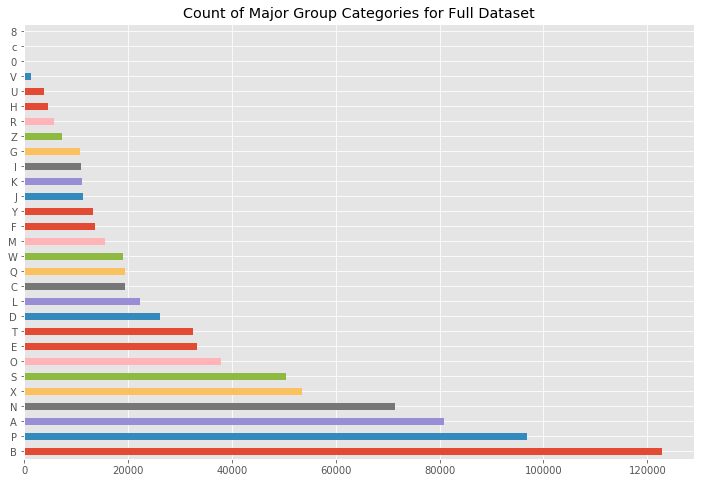

In [85]:
target_count_post = pd.value_counts(df_post['NTEE_CD'].values)
target_count_post.plot.barh(figsize=(12,8))
plt.title('Count of Major Group Categories for Full Dataset');

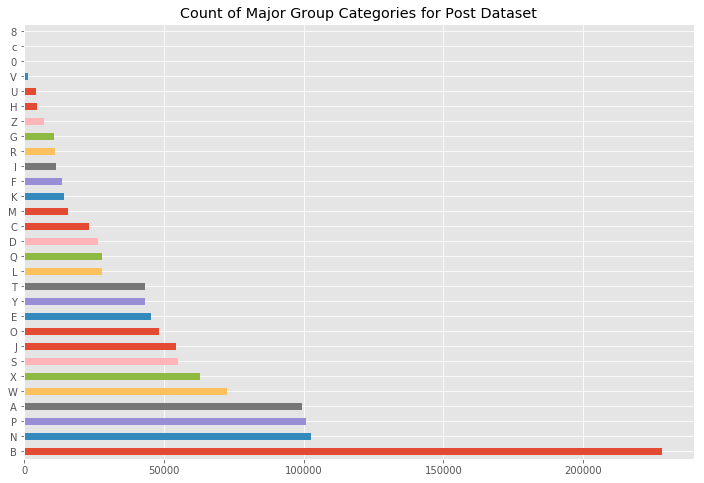

In [86]:
target_count_full = pd.value_counts(df['NTEE_CD'].values)
target_count_full.plot.barh(figsize=(12,8))
plt.title('Count of Major Group Categories for Post Dataset');

In [49]:
df.NTEE_CD.value_counts(normalize=True)

B    1.972142e-01
N    8.880596e-02
P    8.717863e-02
A    8.598883e-02
W    6.278345e-02
X    5.447735e-02
S    4.774928e-02
J    4.689239e-02
O    4.173199e-02
E    3.924344e-02
Y    3.749593e-02
T    3.744491e-02
L    2.417036e-02
Q    2.404066e-02
D    2.282060e-02
C    2.014355e-02
M    1.368873e-02
K    1.244878e-02
F    1.176828e-02
I    9.862525e-03
R    9.572857e-03
G    9.338529e-03
Z    6.274108e-03
H    3.946393e-03
U    3.782104e-03
V    1.122353e-03
0    1.037614e-05
c    2.594036e-06
8    8.646787e-07
Name: NTEE_CD, dtype: float64

There seems to be some extraneous information in our target variables. Also we have some class balancing issues to keep in mind when we are running our models. Lets excise the odd labels then move forward.

In [87]:
removal = ['c', '0', '8'] #Setting what we don't want

mask = df[df.NTEE_CD.isin(removal)] #Finding the rows that contain those values and masking a mask
df_full = df.drop(mask.index) #Dropping based on index

mask_post = df_post[df_post.NTEE_CD.isin(removal)] #Finding the rows that contain those values and masking a mask
df_post = df_post.drop(mask.index)


df_full.shape, df_post.shape

((1156483, 16), (795596, 16))

In [89]:
df_post.NTEE_CD.value_counts()

B    122782
P     96913
A     80769
N     71509
X     53548
S     50520
O     37988
E     33259
T     32599
D     26164
L     22248
C     19483
Q     19441
W     18994
M     15669
F     13608
Y     13209
J     11440
K     11174
I     10889
G     10797
Z      7251
R      5674
H      4564
U      3806
V      1298
Name: NTEE_CD, dtype: int64

In [88]:
df_full.NTEE_CD.value_counts()

B    228078
N    102704
P    100822
A     99446
W     72609
X     63003
S     55222
J     54231
O     48263
E     45385
Y     43364
T     43305
L     27953
Q     27803
D     26392
C     23296
M     15831
K     14397
F     13610
I     11406
R     11071
G     10800
Z      7256
H      4564
U      4374
V      1298
Name: NTEE_CD, dtype: int64

Now that we have both the full and post datasets, we have one more to make.

I am going to group by the `target` variable and then take subsamples of 10,000 of each group. There are four `target` variables that won't be able to be completely full, given n=10000, without using replacement when taking the samples. If replacement were to be used, there would be a greater chance that our models would over fit on those specific `target`s.  

I will manually remove labels with less than 10K instances and then append them back at the end. Using the [`pd.sample()`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html), I randomly take the necessary samples from the population then create my slimmed down dataset.

In [92]:
to_append = df_full[df_full.NTEE_CD.isin(['Z','H','U','V'])]

df_downsize = df_full[~df_full.NTEE_CD.isin(['Z','H','U','V'])] #The tilda is a negation, everything BUT those listed


df_downsize.shape

(1138991, 16)

In [94]:
df_downsize = df_downsize.groupby('NTEE_CD', as_index=False).apply(lambda x: x.sample(10000, random_state=26))

df_downsize = df_downsize.append(to_append)

df_downsize.head()

,STATE,GROUP,SUBSECTION,AFFILIATION,CLASSIFICATION,DEDUCTIBILITY,FOUNDATION,ORGANIZATION,STATUS,FILING_REQ_CD,PF_FILING_REQ_CD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,RULEYEAR
"(0, 0, 1418730)",TX,0,3,3,1000,1,15,1,1,2,0,0.0,0.0,0.0,A,1991
"(0, 0, 379676)",IA,0,3,3,1000,1,15,1,1,1,0,5997.0,86961.0,86961.0,A,2010
"(0, 0, 117034)",NH,0,3,3,2000,1,15,1,1,2,0,0.0,0.0,0.0,A,2000
"(0, 0, 581463)",MI,0,3,3,1200,1,15,1,1,2,0,0.0,0.0,0.0,A,2010
"(0, 0, 1258637)",TX,5443,3,9,1200,1,15,1,1,2,0,0.0,0.0,0.0,A,2007


In [95]:
df_downsize.shape

(237492, 16)

In [96]:
df_downsize.NTEE_CD.value_counts(normalize=True)

B    0.042107
A    0.042107
F    0.042107
S    0.042107
M    0.042107
C    0.042107
T    0.042107
L    0.042107
R    0.042107
N    0.042107
Q    0.042107
D    0.042107
O    0.042107
K    0.042107
W    0.042107
P    0.042107
X    0.042107
I    0.042107
Y    0.042107
G    0.042107
J    0.042107
E    0.042107
Z    0.030553
H    0.019217
U    0.018417
V    0.005465
Name: NTEE_CD, dtype: float64

Good, these all look like my expected outcomes. 

### Explore
Lets check the class balance for the rest of the columns

In [52]:
df.columns

Index(['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 'CLASSIFICATION',
       'DEDUCTIBILITY', 'FOUNDATION', 'ORGANIZATION', 'STATUS',
       'FILING_REQ_CD', 'PF_FILING_REQ_CD', 'ASSET_AMT', 'INCOME_AMT',
       'REVENUE_AMT', 'NTEE_CD', 'RULEYEAR'],
      dtype='object')

In [53]:
top_values = []
for col in df.columns:
    top_values.append(df[col].value_counts(normalize=True)[:5])
top_values

[CA    0.103422
 TX    0.068869
 NY    0.060910
 FL    0.048955
 PA    0.042625
 Name: STATE, dtype: float64, 0       0.775829
 820     0.007404
 188     0.006774
 925     0.006450
 1072    0.005382
 Name: GROUP, dtype: float64, 3    0.731922
 4    0.058842
 6    0.049165
 5    0.035975
 7    0.035699
 Name: SUBSECTION, dtype: float64, 3    0.772424
 9    0.221412
 6    0.002686
 1    0.002476
 2    0.000802
 Name: AFFILIATION, dtype: float64, 1000    0.553375
 2000    0.179146
 1200    0.105085
 3000    0.066522
 7000    0.027562
 Name: CLASSIFICATION, dtype: float64, 1    0.796842
 2    0.197174
 0    0.005880
 4    0.000105
 Name: DEDUCTIBILITY, dtype: float64, 15    0.431278
 0     0.267943
 16    0.247533
 11    0.016504
 17    0.014625
 Name: FOUNDATION, dtype: float64, 1    0.754106
 5    0.230147
 2    0.012890
 0    0.001865
 3    0.000931
 Name: ORGANIZATION, dtype: float64, 1     0.999615
 2     0.000296
 25    0.000059
 12    0.000030
 Name: STATUS, dtype: float64, 2     0.

We can see here that most of our classes aren't balanced throughout the data. While not ideal, we can still use different methods to get around the imbalanced data set. Nevertheless, I will still plan on running a base line model.

In [54]:
df.isna().sum()

STATE               0
GROUP               0
SUBSECTION          0
AFFILIATION         0
CLASSIFICATION      0
DEDUCTIBILITY       0
FOUNDATION          0
ORGANIZATION        0
STATUS              0
FILING_REQ_CD       0
PF_FILING_REQ_CD    0
ASSET_AMT           0
INCOME_AMT          0
REVENUE_AMT         0
NTEE_CD             0
RULEYEAR            0
dtype: int64

In [55]:
target_post = pd.DataFrame(df_post.NTEE_CD)
data_post = df_post.drop(['NTEE_CD'], axis=1)

In [56]:
data_post.isna().sum()

STATE               0
GROUP               0
SUBSECTION          0
AFFILIATION         0
CLASSIFICATION      0
DEDUCTIBILITY       0
FOUNDATION          0
ORGANIZATION        0
STATUS              0
FILING_REQ_CD       0
PF_FILING_REQ_CD    0
ASSET_AMT           0
INCOME_AMT          0
REVENUE_AMT         0
RULEYEAR            0
dtype: int64

In [53]:
target_down = pd.DataFrame(df_downsize.NTEE_CD)
data_down = df_downsize.drop(['NTEE_CD'], axis=1)

In [57]:
df_dum_full = pd.get_dummies(df_downsize, columns=['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 
                                       'CLASSIFICATION', 'DEDUCTIBILITY', 'FOUNDATION', 
                                       'ORGANIZATION', 'STATUS', 'FILING_REQ_CD', 
                                       'PF_FILING_REQ_CD'])

<class 'pandas.core.frame.DataFrame'>
Index: 237492 entries, (0, 1686557) to 1690247
Data columns (total 15 columns):
STATE               237492 non-null object
GROUP               237492 non-null int64
SUBSECTION          237492 non-null int64
AFFILIATION         237492 non-null int64
CLASSIFICATION      237492 non-null int64
DEDUCTIBILITY       237492 non-null int64
FOUNDATION          237492 non-null int64
ORGANIZATION        237492 non-null int64
STATUS              237492 non-null int64
FILING_REQ_CD       237492 non-null int64
PF_FILING_REQ_CD    237492 non-null int64
ASSET_AMT           237492 non-null float64
INCOME_AMT          237492 non-null float64
REVENUE_AMT         237492 non-null float64
RULEYEAR            237492 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 29.0+ MB


(None,              NTEE_CD
 (0, 1686557)       A
 (0, 937487)        A
 (0, 1086951)       A
 (0, 34238)         A
 (0, 546195)        A)

In [59]:
data_full.shape

(1156483, 15)

In [60]:
df_dum_post = pd.get_dummies(data_post, columns=['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 
                                       'CLASSIFICATION', 'DEDUCTIBILITY', 'FOUNDATION', 
                                       'ORGANIZATION', 'STATUS', 'FILING_REQ_CD', 
                                       'PF_FILING_REQ_CD'])

In [61]:
from sklearn.model_selection import train_test_split
X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(df_dum_post, target_post, test_size = .2)

In [54]:
df_down = pd.get_dummies(data_down, columns=['STATE', 'GROUP', 'SUBSECTION', 'AFFILIATION', 
                                       'CLASSIFICATION', 'DEDUCTIBILITY', 'FOUNDATION', 
                                       'ORGANIZATION', 'STATUS', 'FILING_REQ_CD', 
                                       'PF_FILING_REQ_CD'])

In [55]:
from sklearn.model_selection import train_test_split
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(df_down, target_down, test_size = .2)

In [62]:
X_train_post.to_pickle('X_train_post')
X_test_post.to_pickle('X_test_post')
y_train_post.to_pickle('y_train_post')
y_test_post.to_pickle('y_test_post')

In [57]:
X_train_down.to_pickle('X_train_down')
X_test_down.to_pickle('X_test_down')
y_train_down.to_pickle('y_train_down')
y_test_down.to_pickle('y_test_down')

### Data Sets <a id='pick_one'></a>  
[TOP](#TOP)

___

#### Full

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train_full = pd.read_pickle('X_train_full')
y_train_full = pd.read_pickle('y_train_full')
X_test_full = pd.read_pickle('X_test_full')
y_test_full = pd.read_pickle('y_test_full')

___

#### Post - 1995

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train_post = pd.read_pickle('X_train_post')
y_train_post = pd.read_pickle('y_train_post')
X_test_post = pd.read_pickle('X_test_post')
y_test_post = pd.read_pickle('y_test_post')

___

Downsized

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_train_down = pd.read_pickle('X_train_down')
y_train_down = pd.read_pickle('y_train_down')
X_test_down = pd.read_pickle('X_test_down')
y_test_down = pd.read_pickle('y_test_down') 

---
## MODELS 

Decision Tree<a id="clf_DT"></a>  
[TOP](#TOP)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import time
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

clf_DT = DecisionTreeClassifier(max_features='auto', max_depth=10, min_samples_split=1000)

In [4]:
start_time = time.time()

clf_DT.fit(X_train_post, y_train_post)
print("--- %s seconds ---" % (time.time() - start_time))

--- 88.6001181602478 seconds ---


In [5]:
y_hat_post = clf_DT.predict(X_test_post)

In [6]:
acc = accuracy_score(y_test_post,y_hat_post) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :23.230266465560582


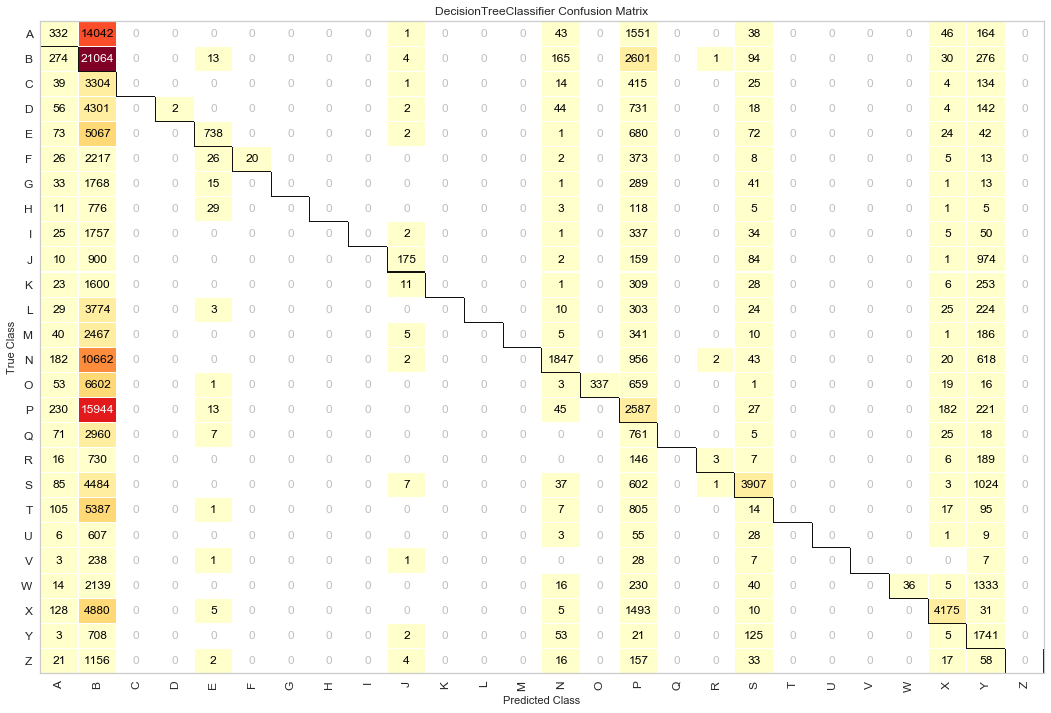

In [7]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(clf_DT, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_post, y_test_post)

# How did we do?
cm.poof()

In [11]:
start_time = time.time()

clf_DT.fit(X_train_full, y_train_full)
print("--- %s seconds ---" % (time.time() - start_time))

--- 192.72250962257385 seconds ---


In [12]:
y_hat_full = clf_DT.predict(X_test_full)

In [13]:
acc = accuracy_score(y_test_full,y_hat_full) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :23.59217802219657


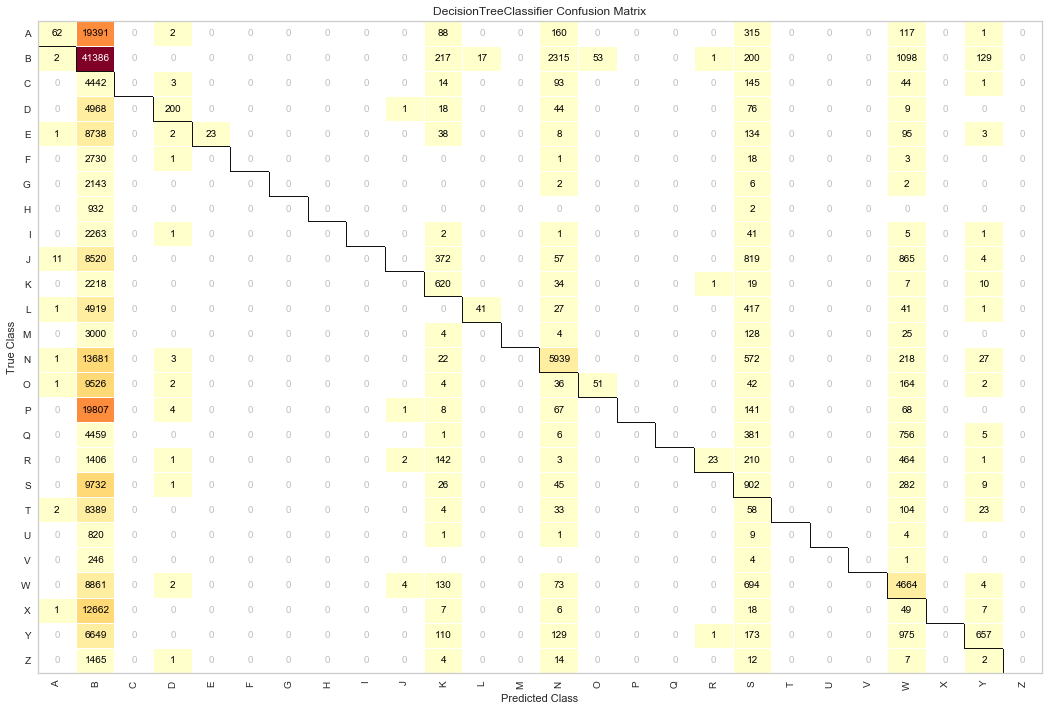

In [14]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(clf_DT, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_full, y_test_full)

# How did we do?
cm.poof()

With both sets of data, there are similar classes that were heavily chosen over others [B, N, S, Y]. Both sets also placed a lot of information into category B, which is to be expected since it is out largest class at almost 20% of the data.

Now lets run some models that can account for imbalanced classes.

In [5]:
forest_post = RandomForestClassifier(n_estimators=100, max_depth= 10, max_features='auto',min_samples_split=1000)

In [6]:
start_time = time.time()

forest_post.fit(X_train_post, y_train_post)
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'X_train_post' is not defined

In [19]:
acc = forest_post.score(X_train_post, y_train_post) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :31.266065020519235


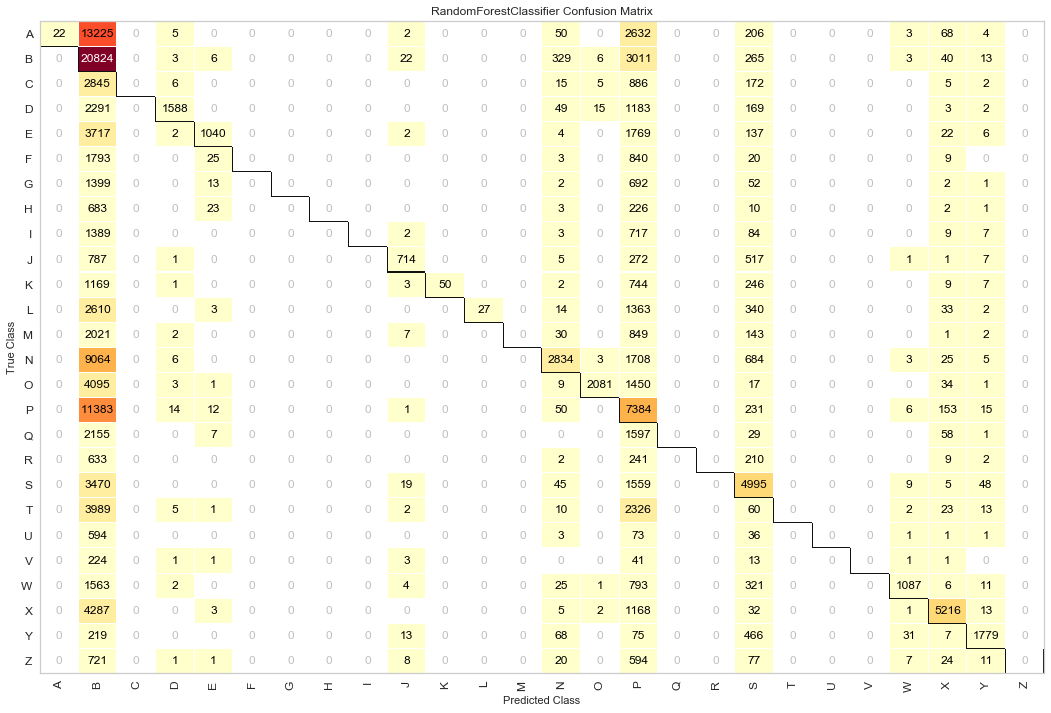

In [20]:
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(forest_post, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_post, y_test_post)

# How did we do?
cm.poof()

In [7]:
forest_full = RandomForestClassifier(n_estimators=100, max_depth= 10, max_features='auto',min_samples_split=1000)

start_time = time.time()

forest_full.fit(X_train_full, y_train_full)
print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\J\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


--- 2661.18941283226 seconds ---


In [8]:
acc = forest_full.score(X_train_full, y_train_full) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :33.10577548730741


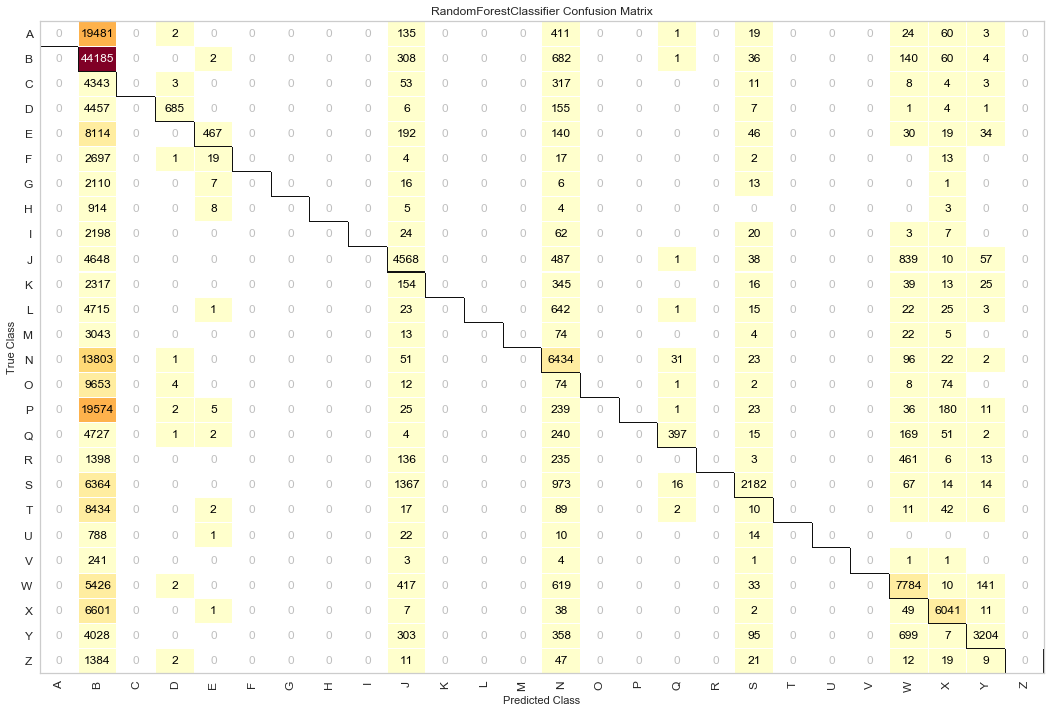

In [11]:
fig, ax = plt.subplots(figsize=(18,12)) #Making the final out put a bit more readable than the standard
cm = ConfusionMatrix(forest_full, ax=ax) #This instance takes in an axes to add to a exisiting figure.

cm.score(X_test_full, y_test_full)

# How did we do?
cm.poof()

As a baseline, the accuracy of my model increased by 7%. Lets run XGBoost and see if it does any better. I will then perform GridSearchCV on the model with the highest baseline accuracy.

---
## MODELS 

### XGBoost<a id="XGB"></a>  
[TOP](#TOP)

At this point, lets try out the powerhouse that is XGBoost. Before changing the data sets in the memory and computationally efficient [DMatrix](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.DMatrix) data type, I will need to process my target variable once more. The DMatrix prefers integers rather than strings, so a quick LabelEncoder will take care of that.

In [3]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#le.fit(y_train_full)
#list(le.classes_)
#y_train_le_full = le.transform(y_train_full.NTEE_CD)
#y_test_le_full = le.transform(y_test_full.NTEE_CD)

le.fit(y_train_post)
list(le.classes_)
y_train_le_post = le.transform(y_train_post.NTEE_CD)
y_test_le_post = le.transform(y_test_post.NTEE_CD)
#
#le.fit(y_train_down)
#list(le.classes_)
#y_train_le = le.transform(y_train_down.NTEE_CD)
#y_test_le = le.transform(y_test_down.NTEE_CD)

C:\Users\J\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
#dtrain_full = xgb.DMatrix(X_train_full, label=y_train_le_full)
#dvalid_full =  xgb.DMatrix(X_test_full, label=y_test_le_full)

dtrain_post = xgb.DMatrix(X_train_post, label=y_train_le_post)
#dvalid_post =  xgb.DMatrix(X_test_post, label=y_test_le_post)

#dtrain_down = xgb.DMatrix(X_train_down, label=y_train_le_down)
#dvalid_down =  xgb.DMatrix(X_test_down, label=y_test_le_down)

In [4]:
#dtrain_full = xgb.DMatrix(X_train_full, label=y_train_le_full)
#dvalid_full =  xgb.DMatrix(X_test_full, label=y_test_le_full)

#dtrain_post = xgb.DMatrix(X_train_post, label=y_train_le_post)
dvalid_post =  xgb.DMatrix(X_test_post, label=y_test_le_post)

#dtrain_down = xgb.DMatrix(X_train_down, label=y_train_le_down)
#dvalid_down =  xgb.DMatrix(X_test_down, label=y_test_le_down)

In [11]:
params = {
    'max_depth': 4,
    'objective': 'multi:softmax',
    'num_class': 26
}

#multi:softmax: set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)

#multi:softprob: same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata * nclass matrix. 
#                The result contains predicted probability of each data point belonging to each class.

In [7]:
import time

start_time = time.time()

model_post = xgb.train(params, dtrain_post)

print("Whole process: %s seconds ---" % (time.time() - start_time))

[22:30:15] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[22:34:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[22:39:05] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[22:43:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[22:47:55] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=4
[22:52:23] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[22:56:51] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[23:01:19] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[23:05:45] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_d

In [9]:
import pickle
pickle.dump(model_post, open("post.pickle.dat", "wb"))

In [5]:
import pickle
model_post = pickle.load(open("post.pickle.dat", "rb"))

In [6]:
import time
import numpy as np

In [7]:
from sklearn.metrics import classification_report

start = time.time()

pred_le = model_post.predict(dvalid_post)

pred = le.inverse_transform(pred_le.astype('int')) #Label Encoder isn't sure how read the numerical numbers so it runs into an error if the type isn't specificed. int36/int64 good too
print(classification_report(y_test_post, pred))
print(f'This took {time.time()-start} seconds')

              precision    recall  f1-score   support

           A       0.38      0.13      0.19     16285
           B       0.33      0.63      0.43     24253
           C       0.85      0.05      0.09      3737
           D       0.96      0.39      0.55      5207
           E       0.60      0.23      0.33      6724
           F       1.00      0.01      0.02      2729
           G       1.00      0.00      0.01      2181
           H       0.43      0.05      0.09       935
           I       0.85      0.05      0.09      2227
           J       0.85      0.45      0.59      2307
           K       0.58      0.09      0.16      2247
           L       0.34      0.23      0.28      4490
           M       0.61      0.14      0.23      3153
           N       0.37      0.39      0.38     14425
           O       0.99      0.28      0.44      7593
           P       0.21      0.60      0.31     19274
           Q       0.78      0.01      0.02      3901
           R       0.33    

In [9]:
acc = accuracy_score(y_test_post, pred) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :37.62506284565108


In [14]:
from yellowbrick.classifier import ROCAUC

rocauc = ROCAUC(model_post, size=(1080, 720), classes=y_test_le_post)

rocauc.score(X_test_post, y_test_post) 

r = rocauc.poof()


YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

In [32]:
evals_result = model_post.evals_result()

print('Access logloss metric directly from validation_0:')
print(evals_result['validation_0']['logloss'])

print('')
print('Access metrics through a loop:')
for e_name, e_mtrs in evals_result.items():
    print('- {}'.format(e_name))
    for e_mtr_name, e_mtr_vals in e_mtrs.items():
        print('   - {}'.format(e_mtr_name))
        print('      - {}'.format(e_mtr_vals))
 
print('')
print('Access complete dict:')
print(evals_result)

AttributeError: 'Booster' object has no attribute 'evals_result'